# Notebook activity 4.4 Another non-parallel slopes model for the wages dataset

In this notebook, we will use R to fit a non-parallel slopes models using data from the wages dataset (Subsection 1.1, Unit 3). We'll take `hourlyWageSqrt` as the response variable and the covariate `workHrs` and the factor `occ` as the explanatory variables. As a reminder, the variables are described as follows:

* `hourlyWageSqrt`: the square root of the individual's hourly wage (in £) 
* `workHrs`: the average number of hours the individual works each week
* `occ`: the occupation of the individual, taking the level codes 1 (Professional), 2 (Employer/Manager), 3 (Intermediate non-manual), 4 (Junior non-manual), 5 (Skilled manual), 6 (Semi-skilled manual) and 7 (Unskilled manual).

The data for these variables are stored in the `wages` data frame.

## (a) Getting started

### (i)

Start by loading the `M348` package and the `wages` data frame, checking that `wages` has loaded correctly and that `occ` is a factor, by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the wages data frame
data(wages)
# Check the data frame has loaded OK
head(wages)
# Check that occ is a factor
class(wages$occ)

## (b) Fitting a non-parallel slopes model

### (i)

In the empty code cell below, fit a non-parallel slopes model for the response variable `hourlyWageSqrt`, using the covariate `workHrs` and the factor `occ` as explanatory variables. Save the output from fitting the model in the object `wageNonParallelFit2` and obtain a summary of the output.

#### Solution <a class="tocSkip">

The required code and resulting output is given in the code cell below. 

In [2]:
wageNonParallelFit2 <- lm(hourlyWageSqrt ~ occ * workHrs, data = wages)
summary(wageNonParallelFit2)

# Or could use the following
# wageNonParallelFit2 <- lm(hourlyWageSqrt ~ occ + workHrs + occ:workHrs, 
#                           data = wages)
# summary(wageNonParallelFit2)


Call:
lm(formula = hourlyWageSqrt ~ occ * workHrs, data = wages)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8718 -0.5134 -0.0094  0.5405  3.4129 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.298731   0.212863  24.893  < 2e-16 ***
occ2          0.287983   0.242645   1.187 0.235371    
occ3         -1.588542   0.277415  -5.726 1.12e-08 ***
occ4         -2.900720   0.265571 -10.923  < 2e-16 ***
occ5         -0.905390   0.242316  -3.736 0.000190 ***
occ6         -2.527257   0.256269  -9.862  < 2e-16 ***
occ7         -2.751295   0.269299 -10.216  < 2e-16 ***
workHrs      -0.018553   0.004704  -3.944 8.17e-05 ***
occ2:workHrs -0.011983   0.005296  -2.262 0.023737 *  
occ3:workHrs  0.025799   0.006685   3.859 0.000116 ***
occ4:workHrs  0.049935   0.006434   7.761 1.12e-14 ***
occ5:workHrs -0.003260   0.005392  -0.605 0.545471    
occ6:workHrs  0.027871   0.006029   4.623 3.92e-06 ***
occ7:workHrs  0.036039   0.006873   5.244 1.67e-07 ***


## (c) Exploring the model

### (i) 

How many parameters altogether are there in the model you fitted in part (b)(i)?

#### Solution <a class="tocSkip">

Altogether there are 14 parameters in the model:

* 1 intercept parameter (the mean response when `occ` takes level 1 and `workHrs` is zero)
* 1 slope parameter for the covariate `workHrs`
* 6 level effect parameters for the factor `occ` (which has 7 levels)
* 6 interaction parameters - one for each of levels 2 to 7 of `occ`.

### (ii)

Write down the fitted model for a worker taking level 3 of `occ`.

#### Solution <a class="tocSkip">

When `occ` takes level 3, the fitted model requires the level effect term for level 3 of `occ` (`occ3` in the summary output table) and the interaction effect term associated with level 3 of `occ` (`occ3:workHrs` in the summary output table) in addition to the intercept parameter and the slope parameter.

So the fitted model for a worker taking level 3 of `occ` is

\begin{equation*} \begin{align*}
\text{hourlyWageSqrt} &= (\widehat\mu + \widehat\alpha_3) + (\widehat\beta + \widehat\gamma_3) \, \text{workHrs},\\
& = (5.298731 -1.588542) +(-0.018553 + 0.025799)\, \text{workHrs} \\
& = 3.710189 + 0.007246\, \text{workHrs}\\
& \simeq 3.710 + 0.0072 \, \text{workHrs}.
\end{align*} \end{equation*}

### (iii)

Use the empty code cell below, to produce the output needed when testing whether the data suggests that the interaction `occ:workHrs` should be in the model.

#### Solution <a class="tocSkip">

In order to test whether the interaction should be in the model, we first need to fit the parallel slopes model (which doesn't include the interaction term). We then need to compare the values of the RSS for the parallel slopes model and the non-parallel slopes model using the `anova()` function

The required code and resulting output is shown below.

In [3]:
# Fit parallel slopes model.
wageParallelFit2 <- lm(hourlyWageSqrt ~ occ + workHrs, data = wages)

# Test whether workHrs:occ should be in the model.
anova(wageParallelFit2, wageNonParallelFit2)

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 3323   2985.238 NA       NA        NA           NA
2 3317   2773.770  6 211.4685  42.14728 8.436814e-50

### (iv)

Use the output you produced in part (iii) to answer the following: which is preferable for these data: a parallel slopes model or a non-parallel slopes model?

#### Solution <a class="tocSkip">

The $p$-value is extremely small and so we conclude that the interaction term *should* be included in the model. Therefore, the non-parallel slopes model (which includes the interaction term) is preferrable to the parallel slopes model (which doesn't include the interaction term).

## (d) Checking the model

### (i)

Use the empty code cell below to produce the residual plot and the normal probability plot for the model you fitted in part (b)(i).

#### Solution <a class="tocSkip">

The required code and resulting plots are shown below. 

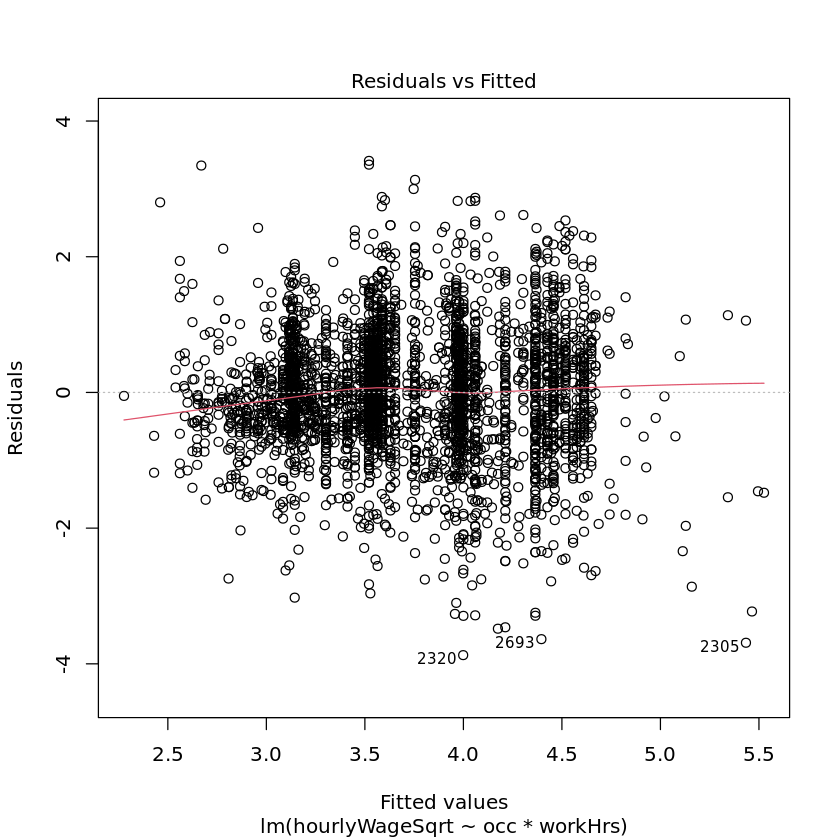

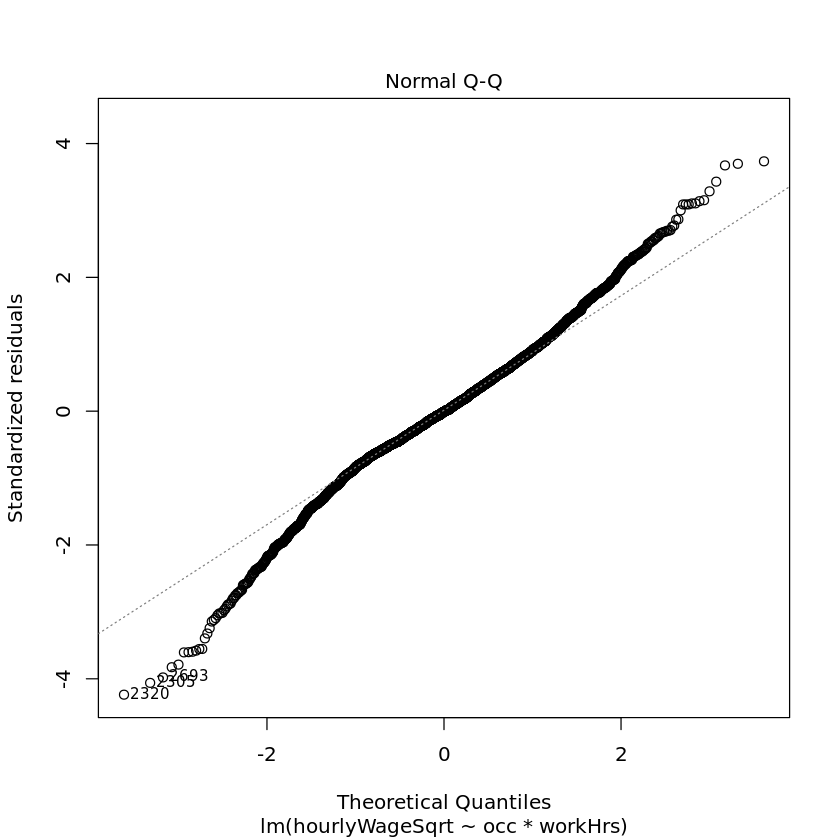

In [4]:
# Obtain the residual plot
plot(wageNonParallelFit2, 1)
# Obtain the normal probability plot
plot(wageNonParallelFit2, 2)

### (ii)

Based on the plots you produced in part (d)(i), do the model assumptions seem reasonable for this model?

#### Solution <a class="tocSkip">

The points in the residual plot seem to be fairly randomly scattered about the zero residual line, and so the assumption that the random terms have zero mean and constant variance seems reasonable. 

The normal probability plot, however, is noticably systematically deviating from the line at the ends of the plot. We found a similar S-shape in the normal probability plot of a non-parallel slopes model fitted to the wages dataset in Activity 20 (Subsection 3.3, Unit 4). The deviations from the line in the normal probability plot, however, seem to be perhaps a little more pronounced here. Having said that, most of the points do seem to lie along the line and also, since there are so many data points being plotted, it's also not clear what proportion of points actually deviate from the line: the proportion that do may in fact be fairly small.